In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load the Dataset

In [ ]:
import pandas as pd

# Load the data
file_path = '/content/drive/My Drive/AMZN.csv'
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Oct 2, 2024",184.44,186.60,184.04,184.76,184.76,"23,664,500"
1,"Oct 1, 2024",184.9,186.19,183.45,185.13,185.13,"36,044,900"
2,"Sep 30, 2024",187.14,188.49,184.65,186.33,186.33,"41,583,900"
3,"Sep 27, 2024",190.68,190.90,187.34,187.97,187.97,"36,002,300"
4,"Sep 26, 2024",194.31,194.53,189.54,191.16,191.16,"36,334,900"


In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Oct 2, 2024",184.44,186.60,184.04,184.76,184.76,"23,664,500"
1,"Oct 1, 2024",184.9,186.19,183.45,185.13,185.13,"36,044,900"
2,"Sep 30, 2024",187.14,188.49,184.65,186.33,186.33,"41,583,900"
3,"Sep 27, 2024",190.68,190.90,187.34,187.97,187.97,"36,002,300"
4,"Sep 26, 2024",194.31,194.53,189.54,191.16,191.16,"36,334,900"


In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Oct 2, 2024",184.44,186.60,184.04,184.76,184.76,"23,664,500"
1,"Oct 1, 2024",184.9,186.19,183.45,185.13,185.13,"36,044,900"
2,"Sep 30, 2024",187.14,188.49,184.65,186.33,186.33,"41,583,900"
3,"Sep 27, 2024",190.68,190.90,187.34,187.97,187.97,"36,002,300"
4,"Sep 26, 2024",194.31,194.53,189.54,191.16,191.16,"36,334,900"


# Data Preprocessing

In [ ]:
# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the Date as the index
df.set_index('Date', inplace=True)

# Handle missing values if any
df.fillna(method='ffill', inplace=True)

# Display summary statistics
df.describe()


<ipython-input-5-72ebc25c832c>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


,High,Low,Close,Adj Close
count,6895.000000,6895.000000,6895.000000,6895.000000
mean,38.730922,37.791051,38.271604,38.271604
std,55.401283,54.099554,54.756555,54.756555
min,0.070000,0.070000,0.070000,0.070000
25%,2.130000,2.050000,2.085000,2.085000
50%,8.890000,8.690000,8.800000,8.800000
75%,57.985000,56.650000,57.350000,57.350000
max,201.200000,199.050000,200.000000,200.000000


In [ ]:
df[['Close', 'Low']]

,Close,Low
Date,,
2024-10-02,184.76,184.04
2024-10-01,185.13,183.45
2024-09-30,186.33,184.65
2024-09-27,187.97,187.34
2024-09-26,191.16,189.54
...,...,...
1997-05-21,0.07,0.07
1997-05-20,0.08,0.08
1997-05-19,0.09,0.08


# Data Visualization

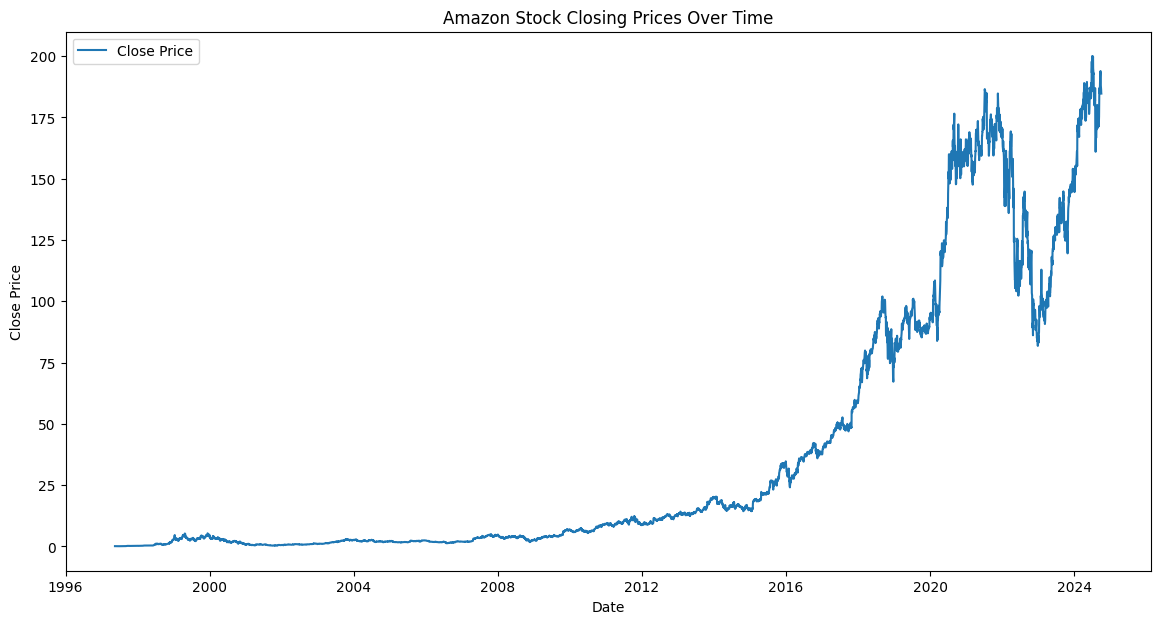

In [ ]:
import matplotlib.pyplot as plt

# Plot closing price over time
plt.figure(figsize=(14,7))
plt.plot(df['Close'], label='Close Price')
plt.title('Amazon Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


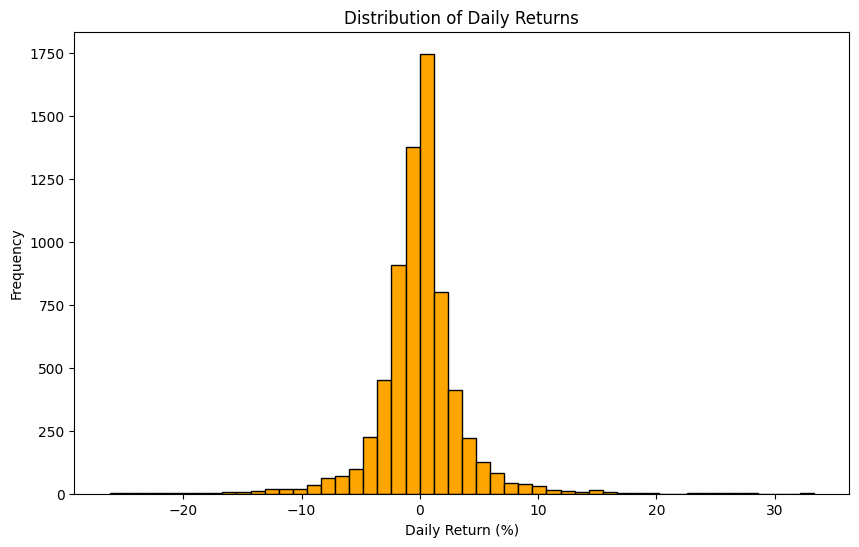

In [ ]:
# Calculate daily returns
df['Daily_Return'] = df['Close'].pct_change() * 100

# Plot histogram of daily returns
plt.figure(figsize=(10, 6))
plt.hist(df['Daily_Return'].dropna(), bins=50, color='orange', edgecolor='black')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.show()


# Statistical Model - ARIMA

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.1 MB/s eta 0:00:00


<ipython-input-10-e308f9c1195a>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df['Close'].resample('M').mean()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1878.813, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1883.718, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1883.094, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1883.502, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1885.014, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1880.086, Time=0.23 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1882.179, Time=0.32 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1885.856, Time=1.66 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1879.999, Time=3.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1883.124, Time=0.18 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1880.667, Time=0.31 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1882.234, Time=0.26 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=1881.856, Time=0.98 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1879.544, Time=0.24 sec

Best model:  ARIMA(2,1,2)(0,0,0)

<ipython-input-10-e308f9c1195a>:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=forecast_start, periods=extended_forecast_steps, freq='M')


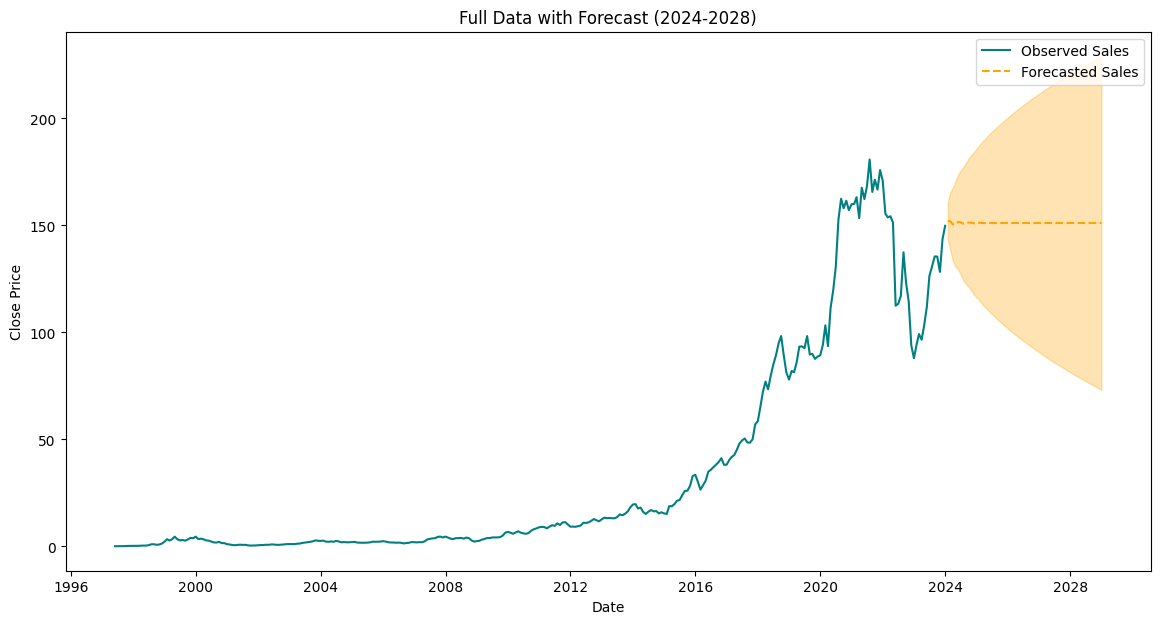

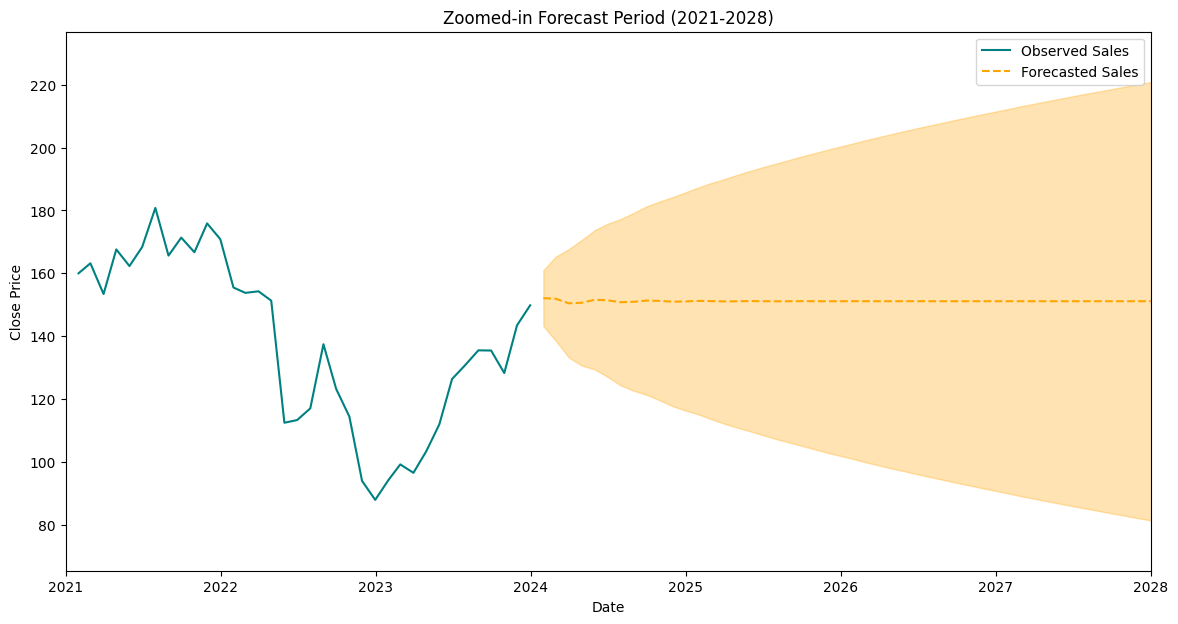

In [ ]:
!pip install pmdarima
# Import necessary libraries
from pmdarima import auto_arima
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA



# Convert daily data to monthly if needed
df_monthly = df['Close'].resample('M').mean()

# Choose the data to proceed with (e.g., monthly data)
data = df_monthly

# Split the data into training and test sets
train_data = data[data.index < '2024-01-01']
test_data = data[data.index >= '2024-01-01']  # Start forecasting after the last training point

# Use auto_arima to find the best p, d, q values
auto_model = auto_arima(train_data, seasonal=False, trace=True, stepwise=True)
print(auto_model.summary())

# Get the optimal order and use it in the ARIMA model
best_order = auto_model.order
arima_model = ARIMA(train_data, order=best_order)
arima_model_fit = arima_model.fit()

# Forecast for an extended period (e.g., up to the end of 2028)
extended_forecast_steps = 60  # 60 months (5 years) from 2024, adjust as needed
arima_forecast = arima_model_fit.forecast(steps=extended_forecast_steps)

# Generate dates for the forecasted values
forecast_start = pd.to_datetime(test_data.index[0])  # Ensure forecast_start is a datetime object
forecast_index = pd.date_range(start=forecast_start, periods=extended_forecast_steps, freq='M')

# Calculate confidence intervals for the forecast
conf_int = arima_model_fit.get_forecast(steps=extended_forecast_steps).conf_int()

# Plot 1: Full data with extended forecast
plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data, label='Observed Sales', color='teal')
plt.plot(forecast_index, arima_forecast, color='orange', linestyle='--', label='Forecasted Sales')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='orange', alpha=0.3)
plt.title('Full Data with Forecast (2024-2028)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Plot 2: Zoomed-in view of the forecast period only
plt.figure(figsize=(14, 7))
plt.plot(train_data.index[-36:], train_data[-36:], label='Observed Sales', color='teal')  # Show recent data only
plt.plot(forecast_index, arima_forecast, color='orange', linestyle='--', label='Forecasted Sales')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='orange', alpha=0.3)
plt.xlim([pd.to_datetime('2021-01-01'), pd.to_datetime('2028-01-01')])  # Ensure the date limits are datetime objects
plt.title('Zoomed-in Forecast Period (2021-2028)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [ ]:
# Import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define the evaluation period for the past 5 years (e.g., 2019-2024)
evaluation_period = 60  # Number of months for evaluation
test_data_evaluation = data[-evaluation_period:]  # Last 60 months of data
train_data_evaluation = data[:-evaluation_period]  # All data before evaluation period

# Fit ARIMA model using the training data before the evaluation period
auto_model_eval = auto_arima(train_data_evaluation, seasonal=False, trace=True, stepwise=True)
best_order_eval = auto_model_eval.order
arima_model_eval = ARIMA(train_data_evaluation, order=best_order_eval)
arima_model_fit_eval = arima_model_eval.fit()

# Forecast for the evaluation period
arima_forecast_eval = arima_model_fit_eval.forecast(steps=evaluation_period)

# Calculate MAE and MSE
arima_mae = mean_absolute_error(test_data_evaluation, arima_forecast_eval)
arima_mse = mean_squared_error(test_data_evaluation, arima_forecast_eval)

print(f"ARIMA Model - MAE: {arima_mae:.2f}, MSE: {arima_mse:.2f}")


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=4.10 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=1174.571, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=1134.661, Time=0.17 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=1071.132, Time=1.76 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1172.575, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=5.28 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.08 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.93 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=1070.767, Time=0.06 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=1057.840, Time=0.08 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1132.666, Time=0.03 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=1059.834, Time=0.13 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=1059.836, Time=0.17 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=1058.967, Time=0.08 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=1116.407, T

# Sarima

<ipython-input-11-46a7f5555639>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df['Close'].resample('M').mean()  # Using monthly data as an example


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1877.537, Time=1.77 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1883.718, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1883.859, Time=0.27 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1884.475, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1885.014, Time=0.03 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=1880.025, Time=1.42 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=1879.775, Time=6.21 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=1877.806, Time=19.16 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=1877.516, Time=4.37 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=1875.516, Time=2.49 sec
 ARIMA(1,1,2)(0,0,2)[12] intercept   : AIC=1876.426, Time=3.98 sec
 ARIMA(2,1,1)(0,0,2)[12] intercept   : AIC=1877.553, Time=2.12 sec
 ARIMA(3,1,2)(0,0,2)[12] intercept   : AIC=1880.372, Time=2.16 sec
 ARIMA(2,1,3)(0,0,2)[12] intercept   : AIC=1877.390, Time=4.61 sec
 ARIMA(1,1,1)(0,0,

<ipython-input-11-46a7f5555639>:36: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=forecast_start, periods=extended_forecast_steps, freq='M')


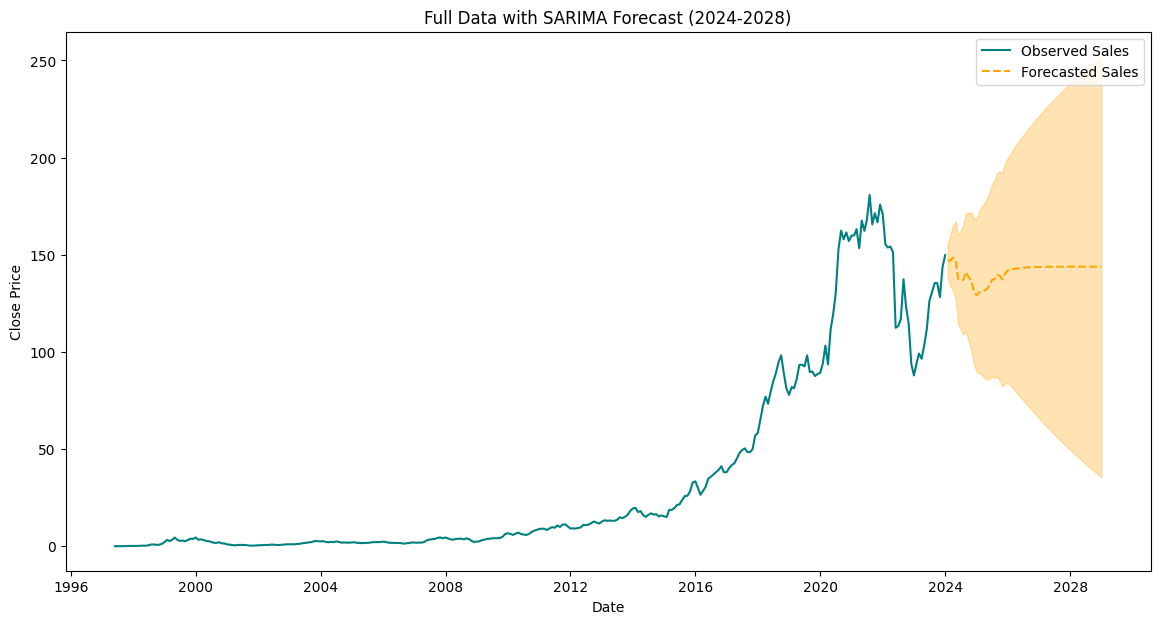

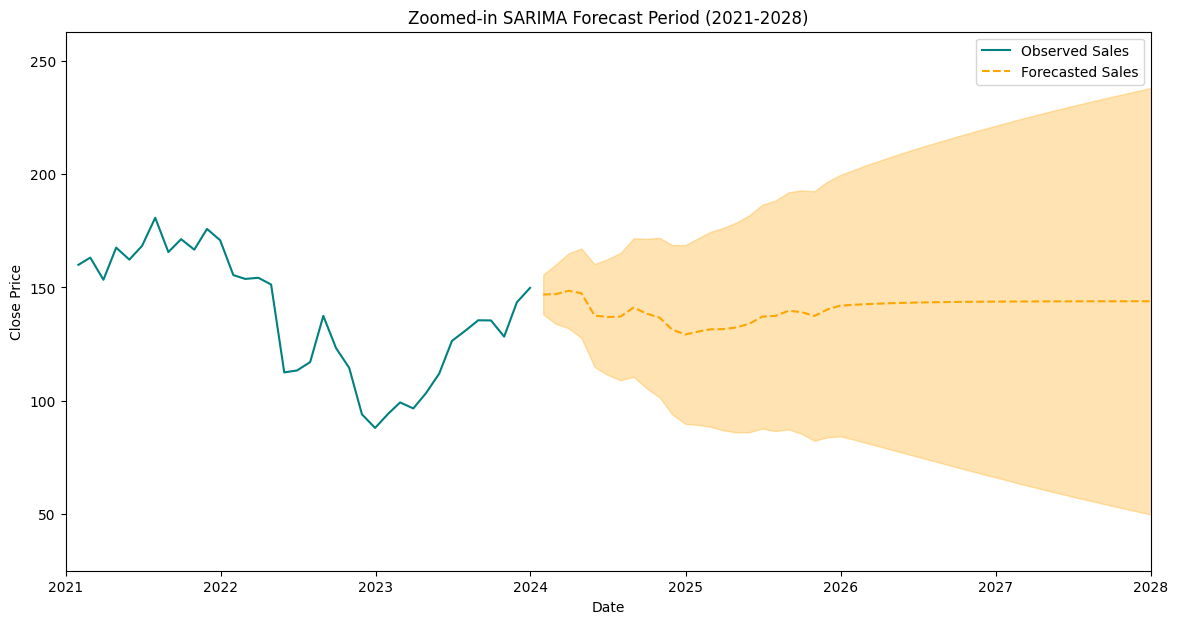

In [ ]:
# Import necessary libraries
from pmdarima import auto_arima
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Convert daily data to monthly if needed
df_monthly = df['Close'].resample('M').mean()  # Using monthly data as an example

# Choose the data to proceed with (e.g., monthly data)
data = df_monthly

# Split the data into training and test sets
train_data = data[data.index < '2024-01-01']
test_data = data[data.index >= '2024-01-01']  # Start forecasting after the last training point

# Use auto_arima to find the best p, d, q values with seasonality
auto_model = auto_arima(train_data, seasonal=True, m=12, trace=True, stepwise=True)
print(auto_model.summary())

# Get the optimal order and seasonal order
best_order = auto_model.order
best_seasonal_order = auto_model.seasonal_order
sarima_model = SARIMAX(train_data, order=best_order, seasonal_order=best_seasonal_order)
sarima_model_fit = sarima_model.fit()

# Forecast for an extended period (e.g., up to the end of 2028)
extended_forecast_steps = 60  # 60 months (5 years) from 2024, adjust as needed
sarima_forecast = sarima_model_fit.forecast(steps=extended_forecast_steps)

# Generate dates for the forecasted values
forecast_start = pd.to_datetime(test_data.index[0])  # Ensure forecast_start is a datetime object
forecast_index = pd.date_range(start=forecast_start, periods=extended_forecast_steps, freq='M')

# Calculate confidence intervals for the forecast
conf_int = sarima_model_fit.get_forecast(steps=extended_forecast_steps).conf_int()

# Plot 1: Full data with extended forecast
plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data, label='Observed Sales', color='teal')
plt.plot(forecast_index, sarima_forecast, color='orange', linestyle='--', label='Forecasted Sales')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='orange', alpha=0.3)
plt.title('Full Data with SARIMA Forecast (2024-2028)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Plot 2: Zoomed-in view of the forecast period only
plt.figure(figsize=(14, 7))
plt.plot(train_data.index[-36:], train_data[-36:], label='Observed Sales', color='teal')  # Show recent data only
plt.plot(forecast_index, sarima_forecast, color='orange', linestyle='--', label='Forecasted Sales')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='orange', alpha=0.3)
plt.xlim([pd.to_datetime('2021-01-01'), pd.to_datetime('2028-01-01')])  # Ensure the date limits are datetime objects
plt.title('Zoomed-in SARIMA Forecast Period (2021-2028)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [ ]:
# SARIMA Model Evaluation
auto_model_sarima_eval = auto_arima(train_data_evaluation, seasonal=True, m=12, trace=True, stepwise=True)
best_order_sarima_eval = auto_model_sarima_eval.order
best_seasonal_order_sarima_eval = auto_model_sarima_eval.seasonal_order
sarima_model_eval = SARIMAX(train_data_evaluation, order=best_order_sarima_eval, seasonal_order=best_seasonal_order_sarima_eval)
sarima_model_fit_eval = sarima_model_eval.fit()

# Forecast for the evaluation period
sarima_forecast_eval = sarima_model_fit_eval.forecast(steps=evaluation_period)

# Calculate MAE and MSE
sarima_mae = mean_absolute_error(test_data_evaluation, sarima_forecast_eval)
sarima_mse = mean_squared_error(test_data_evaluation, sarima_forecast_eval)

print(f"SARIMA Model - MAE: {sarima_mae:.2f}, MSE: {sarima_mse:.2f}")


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[12]             : AIC=1019.204, Time=5.32 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=1172.575, Time=0.06 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=1106.390, Time=1.00 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=1063.909, Time=1.26 sec
 ARIMA(2,2,2)(0,0,1)[12]             : AIC=1018.774, Time=5.16 sec
 ARIMA(2,2,2)(0,0,0)[12]             : AIC=1046.812, Time=1.39 sec
 ARIMA(2,2,2)(0,0,2)[12]             : AIC=1020.713, Time=1.53 sec
 ARIMA(2,2,2)(1,0,0)[12]             : AIC=1018.555, Time=0.57 sec
 ARIMA(2,2,2)(2,0,0)[12]             : AIC=1020.286, Time=1.41 sec
 ARIMA(2,2,2)(2,0,1)[12]             : AIC=1020.189, Time=1.93 sec
 ARIMA(1,2,2)(1,0,0)[12]             : AIC=1052.611, Time=0.46 sec
 ARIMA(2,2,1)(1,0,0)[12]             : AIC=1051.699, Time=0.28 sec
 ARIMA(3,2,2)(1,0,0)[12]             : AIC=1016.280, Time=0.72 sec
 ARIMA(3,2,2)(0,0,0)[12]             : AIC=1045.299, Time=0.31 sec
 ARIMA(3,2,2)(2,0,0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA Model - MAE: 33.13, MSE: 1595.95


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# FBProphet

DEBUG:cmdstanpy:input tempfile: /tmp/tmp6ir7pzrk/umsxfzca.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6ir7pzrk/smu57w5s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7537', 'data', 'file=/tmp/tmp6ir7pzrk/umsxfzca.json', 'init=/tmp/tmp6ir7pzrk/smu57w5s.json', 'output', 'file=/tmp/tmp6ir7pzrk/prophet_modeleeg1zkrq/prophet_model-20241216093107.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:31:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:31:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


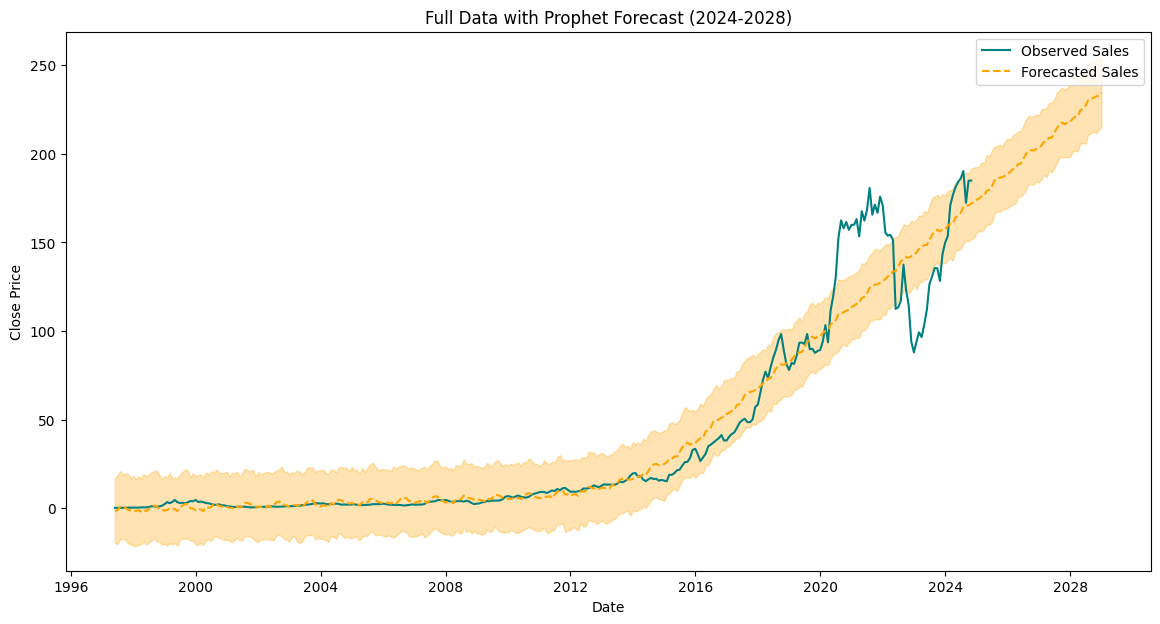

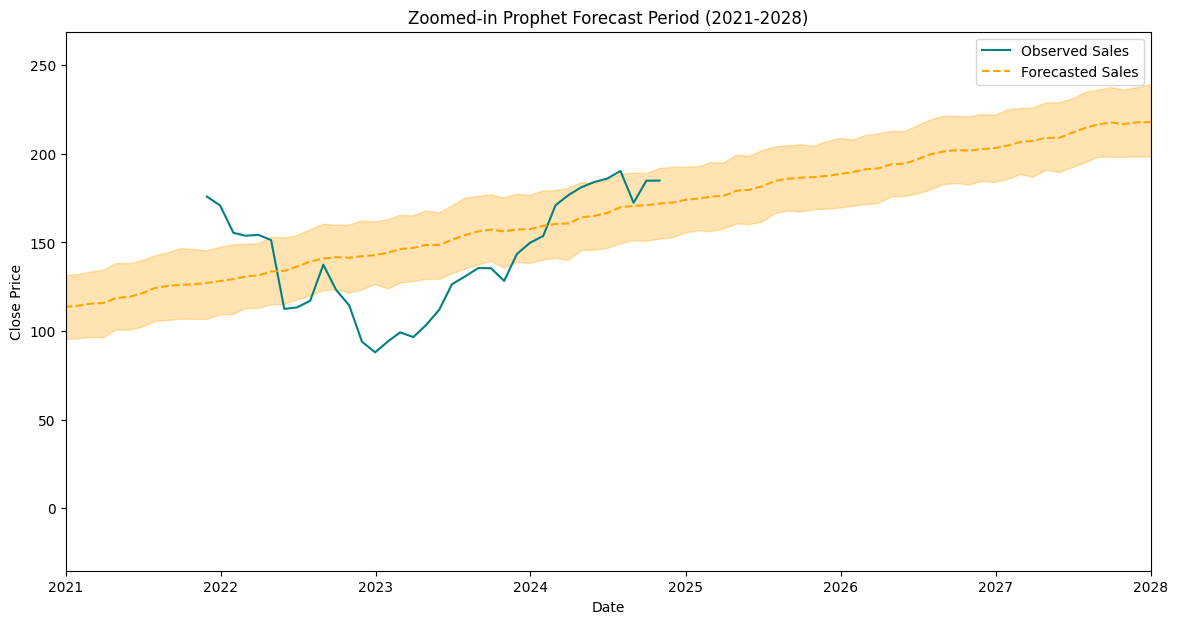

In [ ]:
# Install Prophet package
!pip install prophet

# Import necessary libraries
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Prepare data for Prophet: Prophet requires a DataFrame with columns 'ds' and 'y'
df_prophet = df_monthly.reset_index()
df_prophet.columns = ['ds', 'y']  # Prophet expects the date column to be named 'ds' and the values column to be 'y'

# Split the data into training and test sets
train_data = df_prophet[df_prophet['ds'] < '2024-01-01']
test_data = df_prophet[df_prophet['ds'] >= '2024-01-01']

# Initialize and fit the Prophet model
prophet_model = Prophet(yearly_seasonality=True, daily_seasonality=False, weekly_seasonality=False)
prophet_model.fit(train_data)

# Make future dataframe for prediction up to the end of 2028
future_dates = prophet_model.make_future_dataframe(periods=60, freq='M')  # 60 months into the future
prophet_forecast = prophet_model.predict(future_dates)

# Plot 1: Full data with extended forecast
plt.figure(figsize=(14, 7))
plt.plot(df_prophet['ds'], df_prophet['y'], label='Observed Sales', color='teal')
plt.plot(prophet_forecast['ds'], prophet_forecast['yhat'], color='orange', linestyle='--', label='Forecasted Sales')
plt.fill_between(prophet_forecast['ds'],
                 prophet_forecast['yhat_lower'],
                 prophet_forecast['yhat_upper'],
                 color='orange', alpha=0.3)
plt.title('Full Data with Prophet Forecast (2024-2028)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Plot 2: Zoomed-in view of the forecast period only
plt.figure(figsize=(14, 7))
plt.plot(df_prophet['ds'][-36:], df_prophet['y'][-36:], label='Observed Sales', color='teal')  # Show recent data only
plt.plot(prophet_forecast['ds'], prophet_forecast['yhat'], color='orange', linestyle='--', label='Forecasted Sales')
plt.fill_between(prophet_forecast['ds'],
                 prophet_forecast['yhat_lower'],
                 prophet_forecast['yhat_upper'],
                 color='orange', alpha=0.3)
plt.xlim([pd.to_datetime('2021-01-01'), pd.to_datetime('2028-01-01')])  # Ensure the date limits are datetime objects
plt.title('Zoomed-in Prophet Forecast Period (2021-2028)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [ ]:
# FB Prophet Model Evaluation
train_data_prophet = df_prophet[df_prophet['ds'] < test_data_evaluation.index[0]]
test_data_prophet = df_prophet[df_prophet['ds'] >= test_data_evaluation.index[0]]

prophet_model_eval = Prophet(yearly_seasonality=True, daily_seasonality=False, weekly_seasonality=False)
prophet_model_eval.fit(train_data_prophet)

# Make predictions for the evaluation period
future_dates_eval = prophet_model_eval.make_future_dataframe(periods=evaluation_period, freq='M')
prophet_forecast_eval = prophet_model_eval.predict(future_dates_eval)

# Extract forecast for evaluation period
prophet_forecast_eval_filtered = prophet_forecast_eval[-evaluation_period:]['yhat']

# Calculate MAE and MSE
prophet_mae = mean_absolute_error(test_data_evaluation, prophet_forecast_eval_filtered)
prophet_mse = mean_squared_error(test_data_evaluation, prophet_forecast_eval_filtered)

print(f"FB Prophet Model - MAE: {prophet_mae:.2f}, MSE: {prophet_mse:.2f}")


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6ir7pzrk/a3itii6b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6ir7pzrk/8ce0i0zg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4360', 'data', 'file=/tmp/tmp6ir7pzrk/a3itii6b.json', 'init=/tmp/tmp6ir7pzrk/8ce0i0zg.json', 'output', 'file=/tmp/tmp6ir7pzrk/prophet_model960hhbqz/prophet_model-20241216094118.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:41:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:41:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


FB Prophet Model - MAE: 28.87, MSE: 1130.10


<ipython-input-13-1a51b4ed913c>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df['Close'].resample('M').mean()  # Resample to monthly data for seasonal analysis
<ipython-input-13-1a51b4ed913c>:40: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=test_data.index[0], periods=60, freq='M')


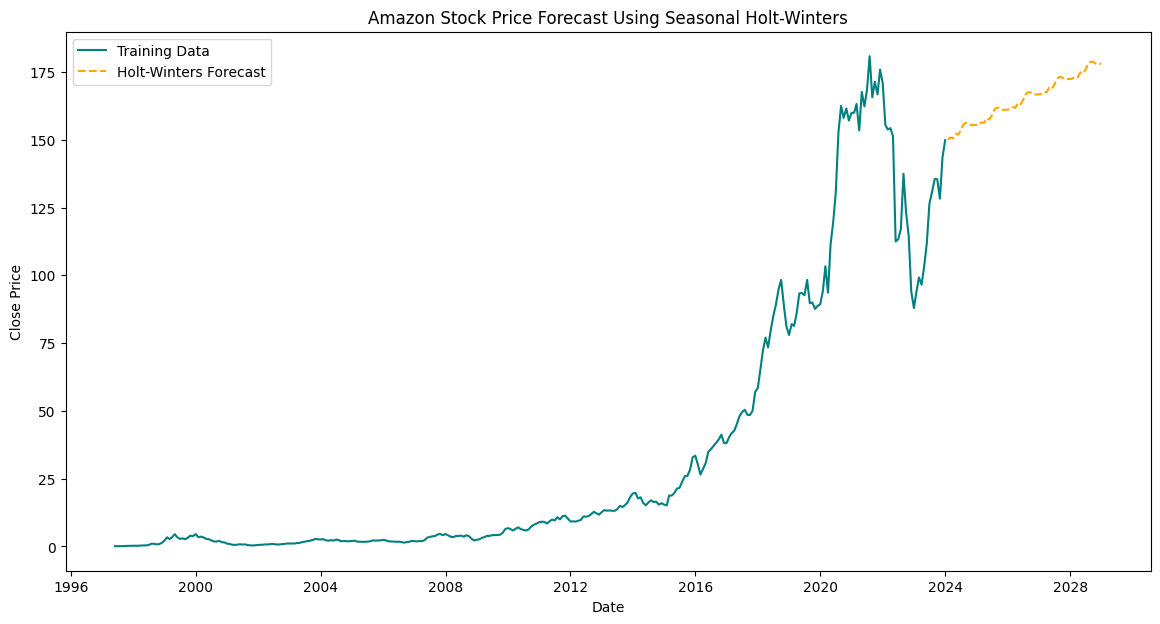

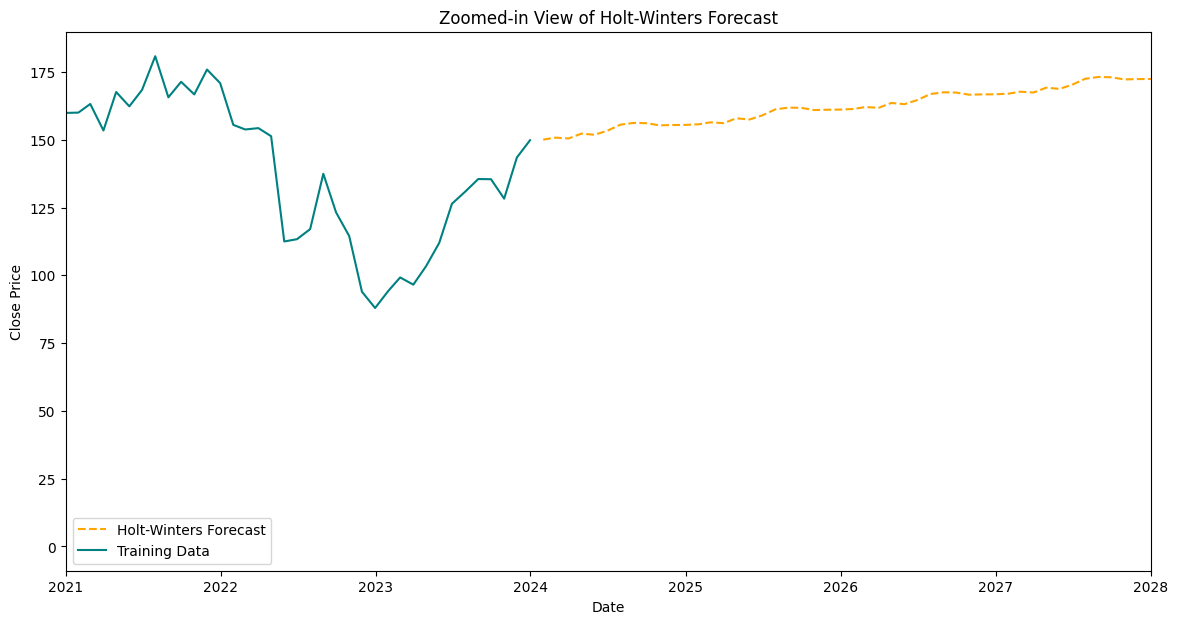

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing



df_monthly = df['Close'].resample('M').mean()  # Resample to monthly data for seasonal analysis

# Split the data into training and test sets
train_data = df_monthly[df_monthly.index < '2024-01-01']
test_data = df_monthly[df_monthly.index >= '2024-01-01']

# Holt-Winters Seasonal Model
def holt_winters_forecast(series, seasonal_periods=12, steps=60, trend='add', seasonal='add'):
    """
    Fits a Holt-Winters model and forecasts future values.
    Args:
        series (pd.Series): Time series data for training the model.
        seasonal_periods (int): Number of periods in a season (e.g., 12 for monthly data).
        steps (int): Number of steps to forecast into the future.
        trend (str): Type of trend component ('add' or 'mul' or None).
        seasonal (str): Type of seasonal component ('add' or 'mul' or None).
    Returns:
        hw_model: Fitted Holt-Winters model.
        forecast: Forecasted values for the specified steps.
    """
    # Fit the model
    model = ExponentialSmoothing(series, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)
    hw_model = model.fit()

    # Forecast future values
    forecast = hw_model.forecast(steps=steps)
    return hw_model, forecast

# Apply Holt-Winters model
hw_model, hw_forecast = holt_winters_forecast(train_data, seasonal_periods=12, steps=60, trend='add', seasonal='add')

# Generate forecast index
forecast_index = pd.date_range(start=test_data.index[0], periods=60, freq='M')

# Plot: Full data with forecast
plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data, label='Training Data', color='teal')
plt.plot(forecast_index, hw_forecast, label='Holt-Winters Forecast', color='orange', linestyle='--')
plt.title('Amazon Stock Price Forecast Using Seasonal Holt-Winters')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Plot: Zoomed-in view of forecast period
plt.figure(figsize=(14, 7))
plt.plot(forecast_index, hw_forecast, label='Holt-Winters Forecast', color='orange', linestyle='--')
plt.plot(train_data.index, train_data, label='Training Data', color='teal')
plt.xlim([pd.to_datetime('2021-01-01'), pd.to_datetime('2028-01-01')])
plt.title('Zoomed-in View of Holt-Winters Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()



In [ ]:
# Holt-Winters Model Evaluation
hw_model_eval, hw_forecast_eval = holt_winters_forecast(train_data_evaluation, seasonal_periods=12, steps=evaluation_period)

# Calculate MAE and MSE
holt_mae = mean_absolute_error(test_data_evaluation, hw_forecast_eval)
holt_mse = mean_squared_error(test_data_evaluation, hw_forecast_eval)

print(f"Holt-Winters Model - MAE: {holt_mae:.2f}, MSE: {holt_mse:.2f}")


Holt-Winters Model - MAE: 33.14, MSE: 1592.69
